# Исследование товарного ассортимента интернет-магазина "Пока все ещё тут"

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наша ближайшая задача — полноценный анализ товарного ассортимента.

Основная задача, запрос менеджера – выявить основные и дополнительные товары. Для этого выполнить шаги:

1.	Сформулировать цель исследования 
      
2.	Загрузка файла с данными, просмотр общей информации и подготовка данных:

    2.1 Проверка на пропуски
    
    2.2	Поиск дубликатов
    
    2.3	Проверка типов данных
    
    2.4	Поиск аномалий в данных
    

3.	Исследовательский анализ данных
    
4.	Категоризация товаров
    
5.	Проверка статистических гипотез
    
6.	Выводы, рекомендации

7.	Презентация, дашборд.

## Цель исследования

Запрос менеджера: актуальность товарного ассортимента. Определить, какие товары приобретаются сами по себе, а какие дополнительно к основным. Актуальные товары – те, которые приобретают часто.

## Загрузка файла с данными, просмотр общей информации и подготовка данных

In [1]:
# импорт библиотек

%pip install -U kaleido -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
import datetime as dt
from scipy import stats as st
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

pd.set_option('display.max_rows', 500)
pio.renderers.default = 'png'

Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
    data = pd.read_csv('https://raw.githubusercontent.com/mchashchukhin/praktikum/main/ecommerce_dataset.csv')
    
except:
    data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1zqoAH6tdMzjtZwXmYKwJpf36C3KA3xWc')

In [3]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


### Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;

- `customer_id` — идентификатор покупателя;

- `order_id` — идентификатор заказа;

- `product` — наименование товара;

- `quantity` — количество товара в заказе;

- `price` — цена товара.

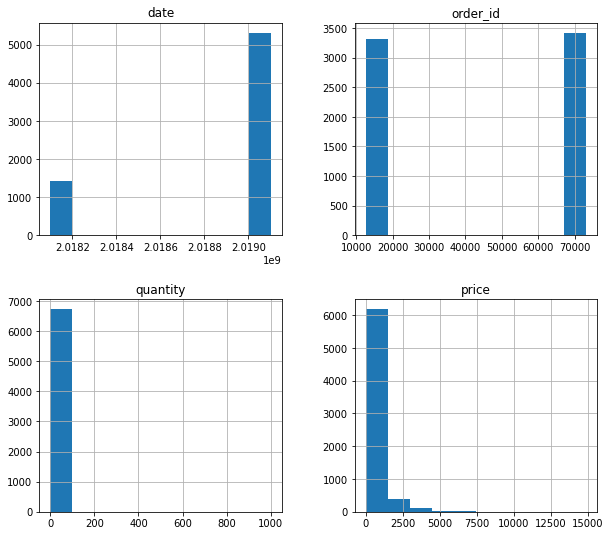

In [6]:
data.hist(figsize=(10,9));

В столбцах количества и цены похоже есть выбросы, их рассмотрим ниже

In [7]:
# подсчет числа пропусков
data.isna().mean().round(3)*100

date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

Пропусков нет

In [8]:
data.duplicated().sum()

0

Явных дубликатов нет

In [9]:
#приводим столбец с датами к нужному типу
data['date'] = pd.to_datetime(data['date'],format = '%Y%m%d%H')

In [10]:
print('Минимальная дата:', data['date'].min())

print('Максимальная дата:', data['date'].max())

Минимальная дата: 2018-10-01 00:00:00
Максимальная дата: 2019-10-31 16:00:00


Видно, что данные присутствуют за два неполных года

In [11]:
#добавляем столбец с выручкой
data['price_total'] = data['price'] * data['quantity']

In [12]:
#добавляем столбцы с разбивкой на год, месяц, час и день недели
data['year'] = data['date'].dt.year

data['month'] = data['date'].dt.month

data['day'] = data['date'].dt.day

data['hour'] = data['date'].dt.hour

data['day_of_week'] = data['date'].dt.dayofweek + 1

data.head()

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,1,0,1
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,1,0,1
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,1,0,1
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,1,0,1
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,1,0,1


In [13]:
#ищем неявные дубли, где одному номеру заказа соответствуют несколько пользователей
dt1 = (data[['customer_id','order_id']]
       .drop_duplicates()
       .groupby(['order_id'],as_index=False)
       .agg({'customer_id':'count'})
       .sort_values('customer_id',ascending=False)
      )

dt1.query('customer_id > 1')

,order_id,customer_id
2610,72845,4
1914,71480,3
902,69485,3
817,69310,2
1066,69833,2
2576,72790,2
2569,72778,2
248,14872,2
1939,71542,2
1712,71054,2


In [14]:
data.query('order_id == 72845')

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019,10,3,14,4
6505,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019,10,3,15,4
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019,10,4,8,5
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019,10,7,20,1


In [15]:
#ищем дубли, где один заказ соответствует разным датам

dt2 = (data[['customer_id','date','order_id','product']]
       .drop_duplicates()
       .groupby(['customer_id','order_id','product'],as_index=False)
       .agg({'date':'count'})
       .sort_values('date',ascending=False)
      )
dt2.query('date > 1').head(20)

,customer_id,order_id,product,date
543,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,74
535,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",74
546,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,74
542,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,74
541,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,74
540,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",74
539,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,74
538,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,74
537,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",74
545,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",74


In [16]:
data.query('order_id == 14833').head(40)

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
4157,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,120.0,2019,5,31,12,5
4158,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,120.0,2019,5,31,12,5
4159,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,120.0,2019,5,31,12,5
4160,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,120.0,2019,5,31,12,5
4161,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,120.0,2019,5,31,12,5
4162,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",1,120.0,120.0,2019,5,31,12,5
4163,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,1,120.0,120.0,2019,5,31,12,5
4164,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,120.0,2019,5,31,12,5
4165,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019,5,31,12,5
4166,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,120.0,2019,5,31,12,5


Похоже, что заказ несколько раз переоформлялся, но видимо по ошибке номер заказа оставался тот же.

Отфильтруем исходный датасет, оставим только уникальные сочетания заказа и товара с последней датой

In [17]:
data = data.drop_duplicates(subset=['order_id', 'product'], keep='last')

data.to_csv('ecommerce_filtered.csv')

In [18]:
round((1 - len(data) / 6737),3)*100

28.499999999999996

По итогу отбрасываем около 28%, довольно много, но эти строки могут в дальнейшем исказить анализ

Предобработка завершена, изменены типы данных, выполнена проверка на пропуски и дубликаты, добавлены новые столбцы.

## Исследовательский анализ данных

In [19]:
data

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,1,0,1
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,1,0,1
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,1,0,1
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,1,0,1
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0,2019,10,31,11,4
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2019,10,31,12,4
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,2019,10,31,13,4
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,397.0,2019,10,31,14,4


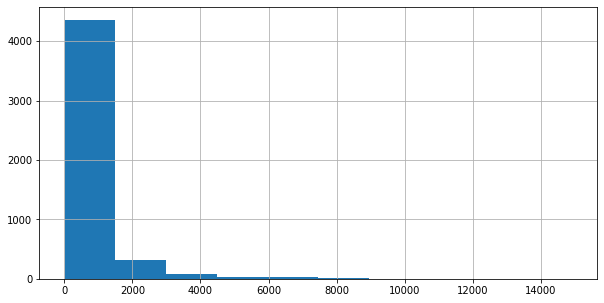

In [20]:
#смотрим распределение цен
data.price.hist(figsize=(10,5));

In [21]:
data.query('price > 3000')['order_id'].count()

138

Видим, что цены позиций в основном лежат в диапазоне до 2000 рублей, дорогих товаров немного

<AxesSubplot:>

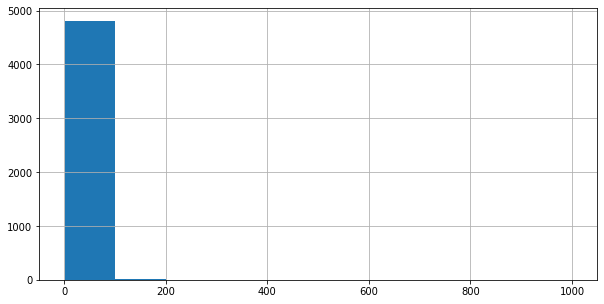

In [22]:
#смотрим распределение количества позиций в заказе
data.quantity.hist(figsize=(10,5))

In [23]:
data.query('quantity > 10').head(50)

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38.0,3648.0,2018,10,1,15,1
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0,2018,10,2,11,2
43,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0,1050.0,2018,10,2,11,2
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,Герань домашняя (пеларгония зональная) цветуща...,11,142.0,1562.0,2018,10,2,15,2
93,2018-10-04 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68525,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",15,56.0,840.0,2018,10,4,13,4
144,2018-10-08 15:00:00,9151d307-654c-4239-a888-ada5ca45f0b2,68571,Набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,7474.0,2018,10,8,15,1
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"Стяжка оконная с болтом СТ-55 цинк, 1108354",64,19.0,1216.0,2018,10,9,9,2
164,2018-10-09 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68585,"Крючок одежный тройной латунь (Б-47), 1110182",25,57.0,1425.0,2018,10,9,11,2
173,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,Муляж Апельсин 8 см полиуретан,25,51.0,1275.0,2018,10,10,14,3
174,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,Муляж Яблоко зеленый 9 см полиуретан,25,51.0,1275.0,2018,10,10,14,3


In [24]:
data.query('quantity > 10')['order_id'].count()

148

In [25]:
data = data.query('quantity < 10')

Видим, что большая часть заказов содержит менее 10 товаров. Все, что больше, выглядит как аномалия, поэтому фильтруем данные. Возможно, это были оптовые закупки от юрлиц, но их относительно мало - можно считать это выбросом.

In [26]:
#смотрим статистики по выручке
data.groupby('order_id',as_index=False).agg({'price_total':'sum'})['price_total'].describe()

count     2592.000000
mean      1085.376929
std       1453.597901
min         14.000000
25%        266.250000
50%        638.000000
75%       1322.500000
max      24370.000000
Name: price_total, dtype: float64

Видно, что медиана почти вдвое меньше среднего, максимум намного больше. Стоит рассмотреть столбец на выбросы.

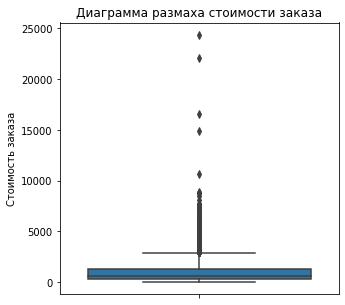

In [27]:
#строим диаграмму размаха
boxdata = data.groupby('order_id',as_index=False).agg({'price_total':'sum'})

plt.figure(figsize=(5,5))

sns.boxplot(data=boxdata, y='price_total')
plt.title('Диаграмма размаха стоимости заказа')
plt.ylabel('Стоимость заказа')
plt.show();

In [28]:
data.query('price_total > 3000')['order_id'].count()

164

In [29]:
data.query('price_total > 3000')

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week
51,2018-10-02 15:00:00,494a90f5-2198-4212-8fc9-e3e22ad7afd9,68505,Ерш для туалета с подставкой MALIBU фарфор 47х...,1,3524.0,3524.0,2018,10,2,15,2
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018,10,3,4,3
97,2018-10-04 17:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68528,Мусорный контейнер в ванную комнату BOWL-SHINY...,2,1649.0,3298.0,2018,10,4,17,4
98,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,68529,Сумка-тележка хозяйственная Andersen Scala Sho...,1,5024.0,5024.0,2018,10,4,17,4
99,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,68529,Сумка-тележка хозяйственная Rolser Jet Cuadro ...,1,3734.0,3734.0,2018,10,4,17,4
121,2018-10-07 07:00:00,f37fa8c2-24a0-451a-8306-39d397e7c4b2,68554,Стремянка алюминиевая Hailo 4302-301 LivingSte...,1,4949.0,4949.0,2018,10,7,7,7
172,2018-10-10 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68597,Сумка-тележка хозяйственная Andersen Scala Sho...,1,3899.0,3899.0,2018,10,10,13,3
189,2018-10-11 09:00:00,f27dac20-43e2-4f49-b799-a93e0e2b4ade,68606,Сумка-тележка хозяйственная Rolser Jet C. Capr...,1,3089.0,3089.0,2018,10,11,9,4
268,2018-10-16 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68661,Штора для ванной комнаты Diamante 240х200 см б...,4,1199.0,4796.0,2018,10,16,11,2
269,2018-10-16 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68662,Стремянки Colombo Leonardo 3 ступени G300A03W ...,1,3974.0,3974.0,2018,10,16,11,2


Видим ряд дорогих заказов, в таблице в основном заказы до 3000. Но раз такие товары покупают, думаю, можно их оставить в датасете.

In [30]:
#строим распределения по различным временным отрезкам
orders_yr = data.groupby('year', as_index=False).agg({'order_id':'count'}).sort_values('year')

orders_yr

,year,order_id
0,2018,1148
1,2019,3450


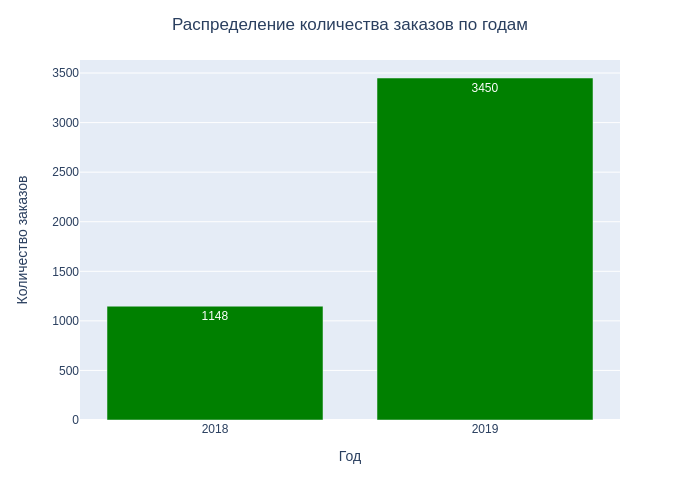

In [31]:
fig = px.bar(orders_yr,
             x='year',
             y='order_id',
             labels=({'year':'Год', 'order_id':'Количество заказов'}),
             text='order_id'
            )

fig.update_layout(title='Распределение количества заказов по годам', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show() 

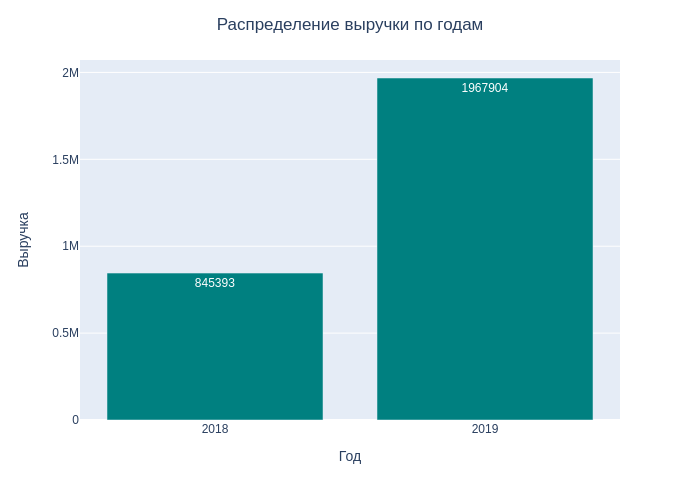

In [32]:
rev_yr = data.groupby('year', as_index=False).agg({'price_total':'sum'})

fig = px.bar(rev_yr,
             x='year',
             y='price_total',
             labels=({'year':'Год', 'price_total':'Выручка'}),
             text='price_total'
            )

fig.update_layout(title='Распределение выручки по годам', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='Teal')
fig.show() 

Выручка и заказы больше в 2019 году, но т.к данные за неполные года, адекватно сравнить можно только пересекающиеся даты, т.е за октябрь.

In [33]:
orders_yr = data.query('month == 10').groupby('year', as_index=False).agg({'order_id':'count'}).sort_values('year')

orders_yr

,year,order_id
0,2018,449
1,2019,203


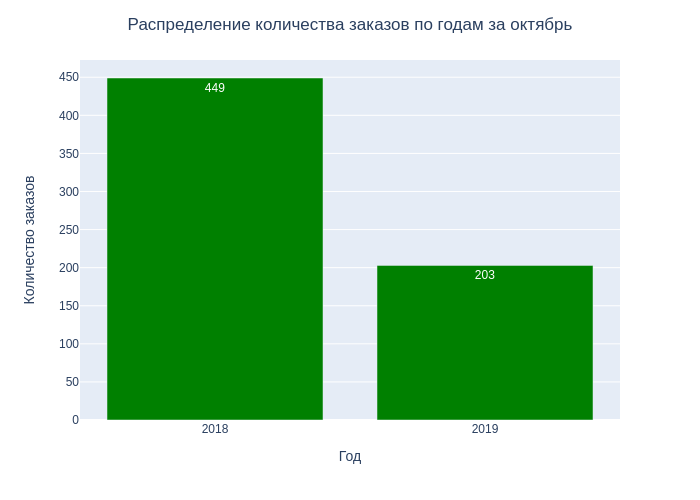

In [34]:
fig = px.bar(orders_yr,
             x='year',
             y='order_id',
             labels=({'year':'Год', 'order_id':'Количество заказов'}),
             text='order_id'
            )

fig.update_layout(title='Распределение количества заказов по годам за октябрь', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show() 

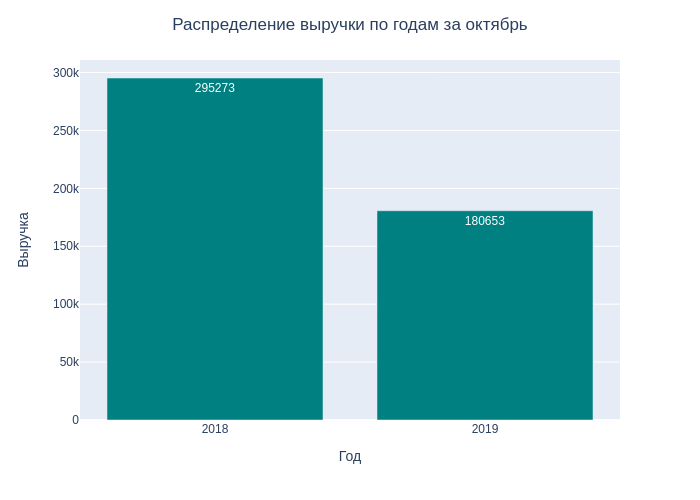

In [35]:
rev_yr = data.query('month == 10').groupby('year', as_index=False).agg({'price_total':'sum'})

fig = px.bar(rev_yr,
             x='year',
             y='price_total',
             labels=({'year':'Год', 'price_total':'Выручка'}),
             text='price_total'
            )

fig.update_layout(title='Распределение выручки по годам за октябрь', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='Teal')
fig.show() 

Видим, что с 2018 наоборот произошёл спад по заказам и выручке.

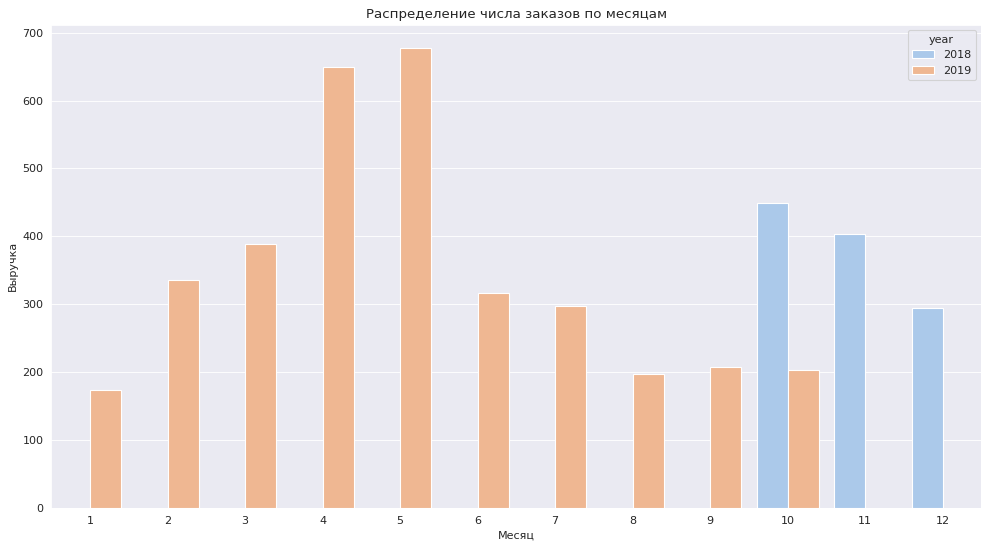

In [36]:
sns.set_palette('pastel')
sns.set_style('darkgrid')

plt.figure(figsize=(15,8), dpi = 80)

orders_month = data.groupby(['month','year'], as_index=False).agg({'order_id':'count'}).sort_values('month')


sns.barplot(data = orders_month, x = 'month', y = 'order_id', hue = 'year')
plt.title('Распределение числа заказов по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Видим, что число заказов растет весной и уменьшается с конца прошлого года.

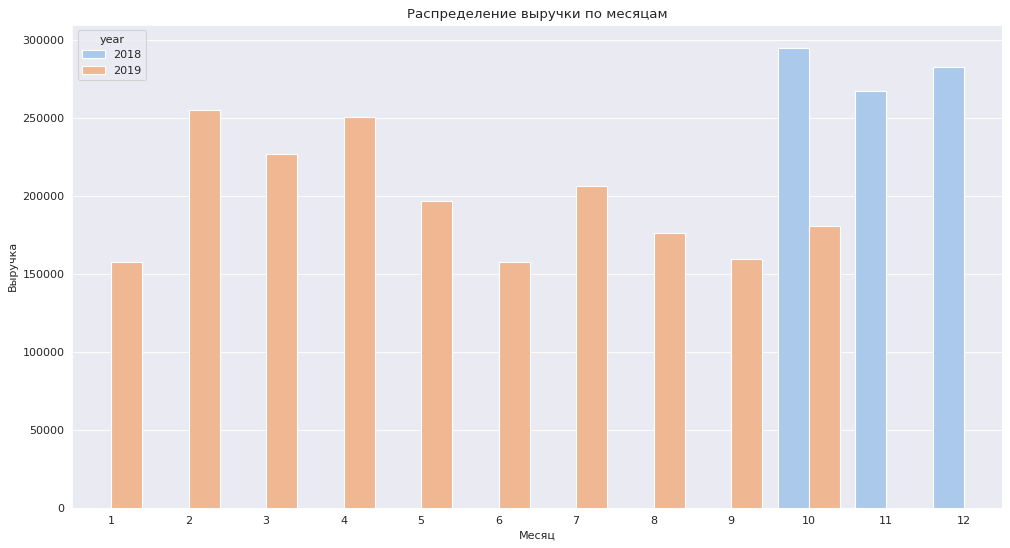

In [37]:
plt.figure(figsize=(15,8), dpi = 80)

rev_mth = data.groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_mth, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Видно, что выручка с прошлого года изменяется скачкообразно, но виден тренд на уменьшение.

In [38]:
orders_weekday = data.groupby('day_of_week', as_index=False).agg({'order_id':'count'}).sort_values('day_of_week')

orders_weekday

,day_of_week,order_id
0,1,864
1,2,732
2,3,720
3,4,721
4,5,570
5,6,496
6,7,495


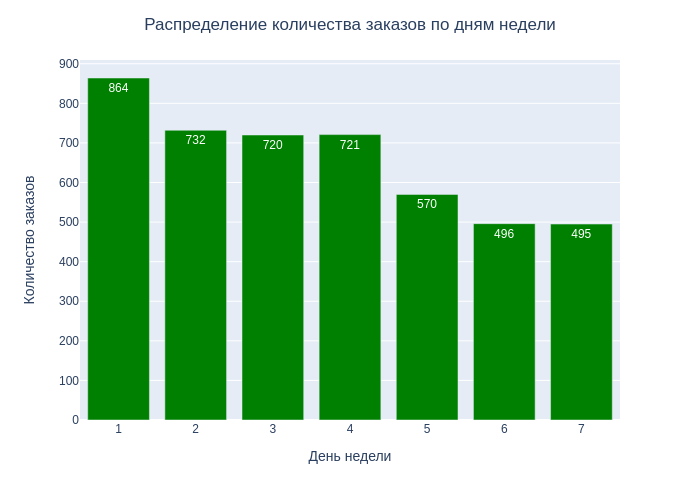

In [39]:
fig = px.bar(orders_weekday,
             x='day_of_week',
             y='order_id',
             labels=({'day_of_week':'День недели', 'order_id':'Количество заказов'}),
             text='order_id'
            )

fig.update_layout(title='Распределение количества заказов по дням недели', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show() 

Покупательская активность выше в будни.

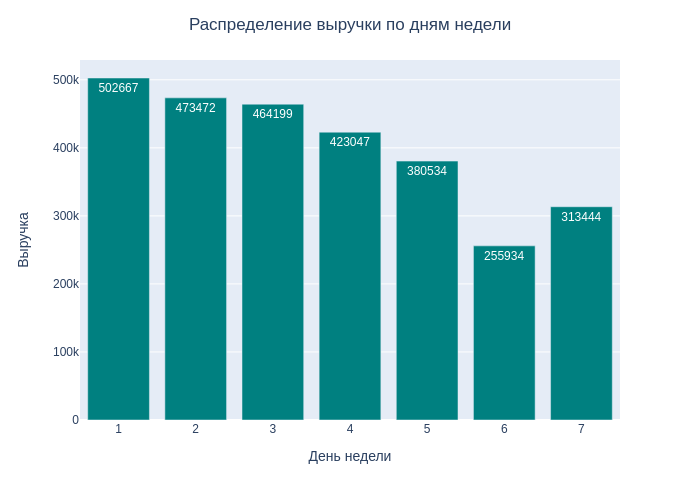

In [40]:
rev_wk = data.groupby('day_of_week', as_index=False).agg({'price_total':'sum'})

fig = px.bar(rev_wk,
             x='day_of_week',
             y='price_total',
             labels=({'day_of_week':'День недели', 'price_total':'Выручка'}),
             text='price_total'
            )

fig.update_layout(title='Распределение выручки по дням недели', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='Teal')
fig.show() 

ВЫручка по будням также выше.

In [41]:
orders_hour = data.groupby('hour', as_index=False).agg({'order_id':'count'}).sort_values('hour')

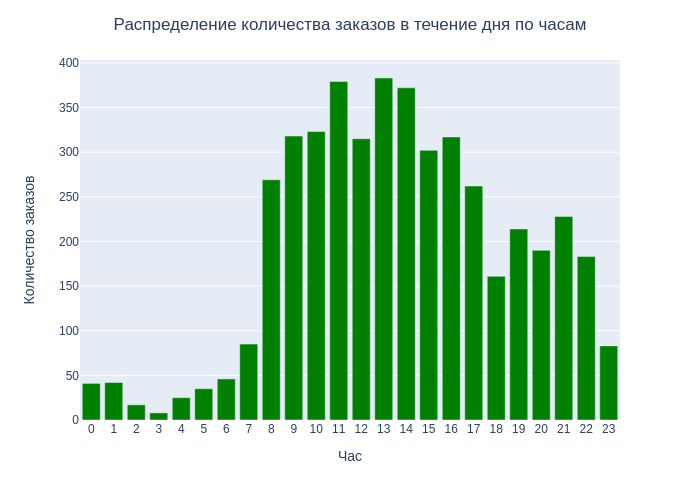

In [42]:
fig = px.bar(orders_hour,
             x='hour',
             y='order_id',
             labels=({'hour':'Час', 'order_id':'Количество заказов'})
            )

fig.update_layout(title='Распределение количества заказов в течение дня по часам', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show() 

Пик заказов приходится на рабочий день, с 8 до 18 часов, второй пик в вечерние часы.

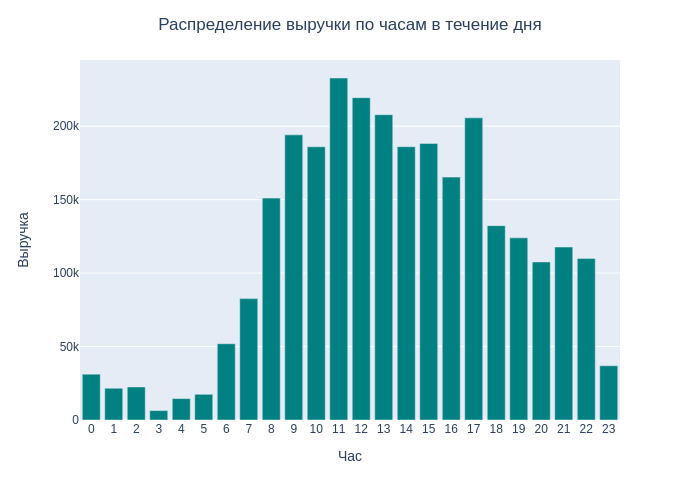

In [43]:
rev_hr = data.groupby('hour', as_index=False).agg({'price_total':'sum'})

fig = px.bar(rev_hr,
             x='hour',
             y='price_total',
             labels=({'hour':'Час', 'price_total':'Выручка'})
            )

fig.update_layout(title='Распределение выручки по часам в течение дня', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='Teal')
fig.show() 

Видим, что больше выручки приходится на рабочие часы.

**Вывод по разделу**:
* в данных, вероятно, есть оптовые заказы, их отфильтровали
* выручка и заказы снижаются по сравнению с прошлым годом
* выручка и покупательская активность выше по будням
* пик заказов и выручки приходится на рабочие часы, второй пик вечером 

## Категоризация данных

После изучения товарного ассортимента, составим списки ключевыз слов и распределим товары по категориям.

In [44]:
t1 = (
    data[data['product']
         .str.contains('Ель|Гипсофила|Кипарисов|Декабрист|Вербена|Гортензия|Бакопа|Калибрахо|Петуния|Каланхо\
         |Однолетнее раст|Остео|рассада одно|Пеларгония|пеларгония|Роза|Флокс|Пуансеттия|\
         |Мединилла|Амариллис|Фуксия|Азалия|Хризантем|Радермахера|Хризолидокарпус|Муррайя|\
         |Циперус|Шеффлера|Юкка|Суккулент|Эхеверия|Адиантум|Кампанула|Калатея|Нолина|Комнатное растени|\
         |Хлорофитум|Цикламен|Глоксиния|Мирт|Иссоп|Сантолина|Аспарагус|Антуриум|Молодило|\
         |Фиалка|Гербера|Альбука|Бальзамин|Бегония|Крассула|Артемизия|Примула|Дендробиум|\
         |Калоцефалус|Каллуна|Капсикум|Мимоза|Соланум|Диффенбахия|Фаленопсис|Подсолнечник|\
         |Пуансетия|Аптения|Новогоднее|Скиммия|Фиттония|Фикус|Гимнокалициум|Кофе|\
         |Алоэ|Крокус|Спатифиллум|Мирт|Гиацинт|Нефролепис|Нарцисс|Афеляндра|Цитрофортунелла|\
         |Пеперомия|Синнингия|Гардения|Земляника|Джункус|Драцена|Фатсия|Сциндапсус|Лантана|\
         |Буддлея|Монарда|Хамедорея|Эхеверия|Импатиенс|Замиокулькас|Пахира|Эхинокактус|Каланхое|Литопс|\
         |Кореопсис|Вероника|Лобелия|Колокольчик|Виола|Лилейник|Папоротник|Платикодон|Энотера|\
         |Кодонанта|Гипсофила|виноград|Пиретрум|Гайлардия|Лапчатка|Седум|Осина|Дихондра|Аквилегия|\
         |Алиссум|Астра|Бузульник|Камнеломка|Овсянница|Солидаго|Физостегия|Ясколка|Вероника|\
         |Анемона|Нивянник|Змееголовник|Цинерария|Клен|Гиностемма|Гелихризум|Калла|Гелихризум ')]
)

t1['category'] = ''

for i in t1['category'].index:
    t1.loc[i,'category'] = 'Декоративные растения'
    


In [45]:
t2 = (data[(data['product'].str.contains('Рассада')\
           & data['product'].str.contains('Кабач|перц|клубн|Патиссона|Арбуза|Дыни|Огур|томата|Капусты|Тыквы'))\
           | data['product'].str.contains('томата|Патисс')]
     )

t2['category'] = ''

for i in t2['category'].index:
    t2.loc[i,'category'] = 'Рассада овощей'

In [46]:
t3 = (data[data['product'].str.contains('Перец|Клубн|Патиссон|Арбуз|Дыня|Огур|Томат|Капуста|Тыква')\
           & data['product'].str.contains('в касс')]
     )

t3['category'] = ''

for i in t3['category'].index:
    t3.loc[i,'category'] = 'Рассада овощей'

In [47]:
t4 = data[data['product'].str.contains('Сумк|Тележка')]

t4['category'] = ''

for i in t4['category'].index:
    t4.loc[i,'category'] = 'Сумки, тележки'
    

In [48]:
t5 = data[data['product'].str.contains('Таз|таз|Корыто|Котел|Ведро|Ванна|Бидон')]

t5['category'] = ''

for i in t5['category'].index:
    t5.loc[i,'category'] = 'Емкости'

In [49]:
t6 = data[data['product'].str.contains('для глад|для глаж|Подрукавни|Сушил|Корз|Чехол|доска|Вешал|Утюг|Плечики|стираль',case=False)]

t6['category'] = ''

for i in t6['category'].index:
    t6.loc[i,'category'] = 'Для ухода за одеждой'

In [50]:
t7 = data[data['product'].str.contains('Термос|Кастрюля|столовых при|Миска|Кувшин|посуд|Стакан|Вилка|Ложка|Нож|\
            |Тарелка|Круж|фужер|Бокал|Банка|Салатн',case=False)]

t7['category'] = ''

for i in t7['category'].index:
    t7.loc[i,'category'] = 'Посуда и столовые приборы'

In [51]:
t8 = (data[data['product'].str.contains('Муляж|Ковр|Ковер|Ковёр|контей|Плед|Скатер|скатерть|искуственных цв|\
            |Цветок искусс|Искусств|для мусор|Урн')]
     )

t8['category'] = ''

for i in t8['category'].index:
    t8.loc[i,'category'] = 'Аксессуары для дома'

In [52]:
t9 = data[data['product'].str.contains('в ванну|Держатель для туал|Вантуз|Карниз|Штанг|Штор|Ёрш|Ерш|Тряпк|\
            |для ванн|швабр|зубная',case=False)]

t9['category'] = ''

for i in t9['category'].index:
    t9.loc[i,'category'] = 'Для ванной'

In [53]:
t10 = (data[data['product'].str.contains('для СВЧ|Соковарка|для прод|дуршлаг|Пресс для чесн|кухонных поло|\
            |Контейнер для овощ|Лоток для х|яиц|Кисточка си|Скребок ко|Овощечистка|Лопатка|Терка|Масленк|Овощеварка|\
            |Рыбочистка|Салфет|Чайник|Чайный|Полотенц|мыла|мыло|Противень|Толкушка|Миксер|сковор|Перчатки',case=False)])

t10['category'] = ''

for i in t10['category'].index:
    t10.loc[i,'category'] = 'Для кухни'

In [54]:
t11 = data[data['product'].str.contains('для обуви|Этажерка|для хран|Контейнер для хр|Полк|Кофр|Комод|Стелла|Стремя|стремян')]

t11['category'] = ''

for i in t11['category'].index:
    t11.loc[i,'category'] = 'Хранение'

In [55]:
t12 = (data[(data['product'].str.contains('Котовник|Валериана|Лук|Душица|Укроп|Кориандр|Розма|Эвкалипт\
|Сельде|Мята|Лемонграсс|Тимьян|Базилик|Лавр|Мангольд|Тмин|Укроп|Чабер|Шалфей|Шпинат|Петрушк|Лаванд|Мелисса|Зверобой|Салат ')\
            & data['product'].str.contains('d-|в горш|кассет'))\
            |data['product'].str.contains('Рассада зе|пряной травы|Пряны|Тимьян')])

t12['category'] = ''

for i in t12['category'].index:
    t12.loc[i,'category'] = 'Рассада трав и зелени'

In [56]:
t13 = data[data['product'].str.contains('Плед|Одеяло|Покрыва|Простын|Подушк')]

t13['category'] = ''

for i in t13['category'].index:
    t13.loc[i,'category'] = 'Для спальни'

In [57]:
t14 =(data[data['product'].str.contains('465009|4660010')\
            |(data['product'].str.contains('Перец|Клубн|Патиссон|Арбуз|Дыня|Огур|Томат|Капуста|Тыква')\
              & data['product'].str.contains('Р-'))])

t14['category'] = ''

for i in t14['category'].index:
    t14.loc[i,'category'] = 'Семена'

In [58]:
t15 = data[data['product'].str.contains('Скребок|швабр|Совок|Щетк|Губка|Чистящий кре|для удале|Антижир|на основе хл|для мытья|средство|Веник|Окномойка|Пылесос',case=False)]

t15['category'] = ''

for i in t15['category'].index:
    t15.loc[i,'category'] = 'Для уборки'

In [59]:
frames = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15]

In [60]:
data2 = pd.concat(frames)

len(data2)

4574

In [61]:
data2

,date,customer_id,order_id,product,quantity,price,price_total,year,month,day,hour,day_of_week,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,1,0,1,Декоративные растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,1,0,1,Декоративные растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,1,0,1,Декоративные растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,1,0,1,Декоративные растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,1,0,1,Декоративные растения
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,2019-09-10 09:00:00,254cea58-53b6-4adf-bba3-9b6074797240,72518,Щетка универсальная с телескопической ручкой D...,1,1612.0,1612.0,2019,9,10,9,2,Для уборки
6471,2019-09-29 19:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,72802,"Совок металический серый, Burstenmann, 1428/0000",1,599.0,599.0,2019,9,29,19,7,Для уборки
6476,2019-09-30 10:00:00,205cb9e0-5c2a-4539-a084-d40e7e4d1d6e,72806,Совок для золы металлический с длинной металли...,1,74.0,74.0,2019,9,30,10,1,Для уборки
6516,2019-10-05 11:00:00,4267e044-d4c1-40d8-a98f-66091d48dc4b,72859,Швабра Leifheit Wet Mop хозяйственная для пола...,1,1649.0,1649.0,2019,10,5,11,6,Для уборки


Товары распределены по категориям, рассмотрим их отдельно.

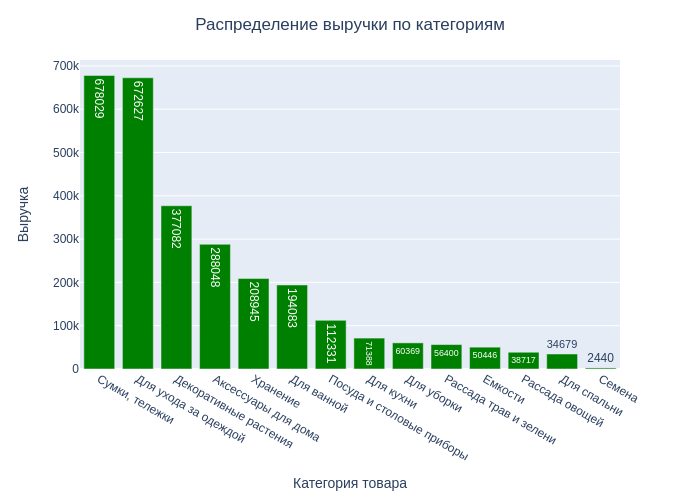

In [62]:
revenue_cat = data2.groupby('category',as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

fig = px.bar(revenue_cat,
             x='category',
             y='price_total',
             labels=({'category':'Категория товара', 'price_total':'Выручка'}),
             text='price_total'
            )

fig.update_layout(title='Распределение выручки по категориям', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show()

Магазин в основном зарабатывает на сумках и товарах для ухода за одеждой.

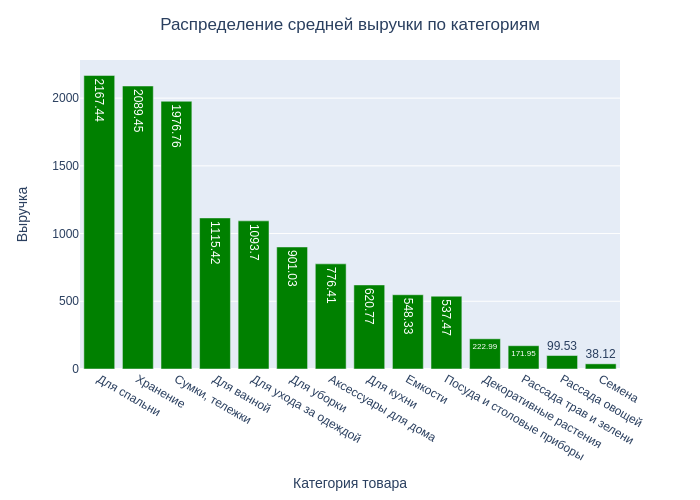

In [63]:
revenue_cat_mean = data2.groupby('category',as_index=False).agg({'price_total':'mean'}).sort_values('price_total',ascending=False).round(2)

fig = px.bar(revenue_cat_mean,
             x='category',
             y='price_total',
             labels=({'category':'Категория товара', 'price_total':'Выручка'}),
             text='price_total'
            )

fig.update_layout(title='Распределение средней выручки по категориям', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show()

Средний чек самый высокий у категории товаров для спальни, хранения и сумки

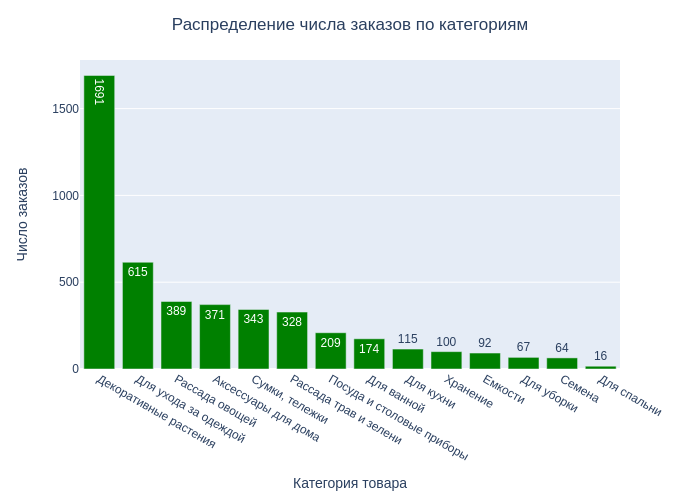

In [64]:
revenue_ord = data2.groupby('category',as_index=False).agg({'order_id':'count'}).sort_values('order_id',ascending=False)

fig = px.bar(revenue_ord,
             x='category',
             y='order_id',
             labels=({'category':'Категория товара', 'order_id':'Число заказов'}),
             text='order_id'
            )

fig.update_layout(title='Распределение числа заказов по категориям', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.update_traces(marker_color='green')
fig.show()

Но тем не менее чаще покупают декоративные растения.

Рассмотрим, как распределяется выручка по категориям с разбивкой на разные временные промежутки.

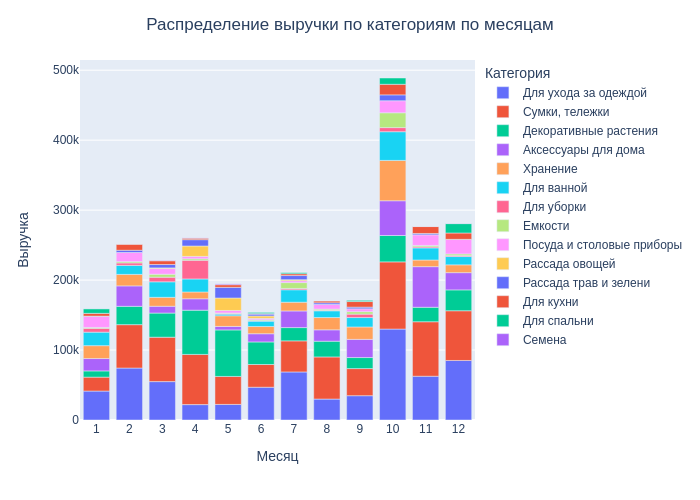

In [116]:
#выручка по месяцам
rev_month = data2.groupby(['month','category'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


fig = px.bar(rev_month,
             x='month',
             y='price_total',
             color='category',
             labels=({'month':'Месяц', 'price_total':'Выручка','category':'Категория'})
             
          )

fig.update_layout(title='Распределение выручки по категориям по месяцам', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.show()

Виден пик в октябре, но это потому, что накладываются данные за октябри 2018 и 2019 годов, их не учитываем. В остальном, выручка наибольшая в начале весны и конце года за счёт продаж рассады, семян, сумок, растений, аксессуаров для дома и ванной, спальни.

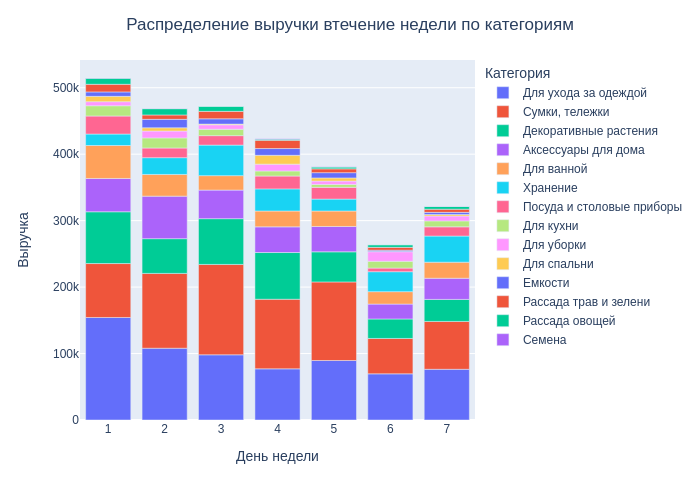

In [117]:
#выручка по дням недели
rev_weekd = data2.groupby(['day_of_week','category'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


fig = px.bar(rev_weekd,
             x='day_of_week',
             y='price_total',
             color='category',
             labels=({'day_of_week':'День недели', 'price_total':'Выручка','category':'Категория'})
             
          )

fig.update_layout(title='Распределение выручки втечение недели по категориям', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.show()

Выручка наибольшая по рабочим дням, структура по категориям аналогичная предыдущему пункту.

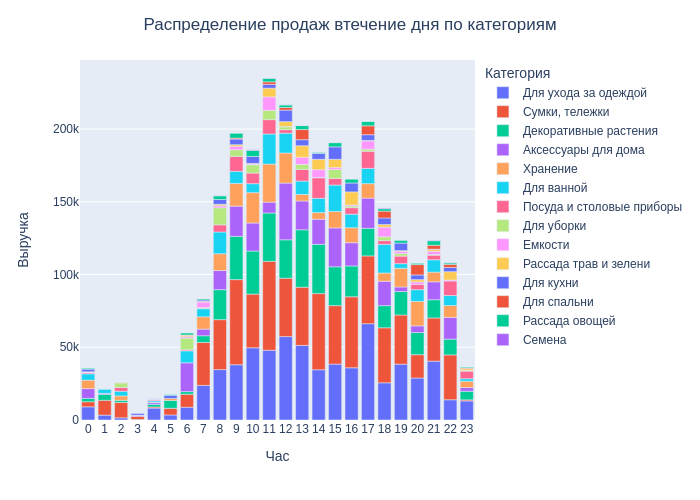

In [113]:
#выручка по часам
rev_hour = data2.groupby(['hour','category'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


fig = px.bar(rev_hour,
             x='hour',
             y='price_total',
             color='category',
             labels=({'hour':'Час', 'price_total':'Выручка','category':'Категория'})
             
          )

fig.update_layout(title='Распределение продаж втечение дня по категориям', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.show()

Наибольшая выручка в рабочие и вечерние часы, структура аналогичная.

Рассмотрим подробнее наиболее прибыльные категории: сумки, растения, товары для ухода за одеждой, для дома и рассаду.

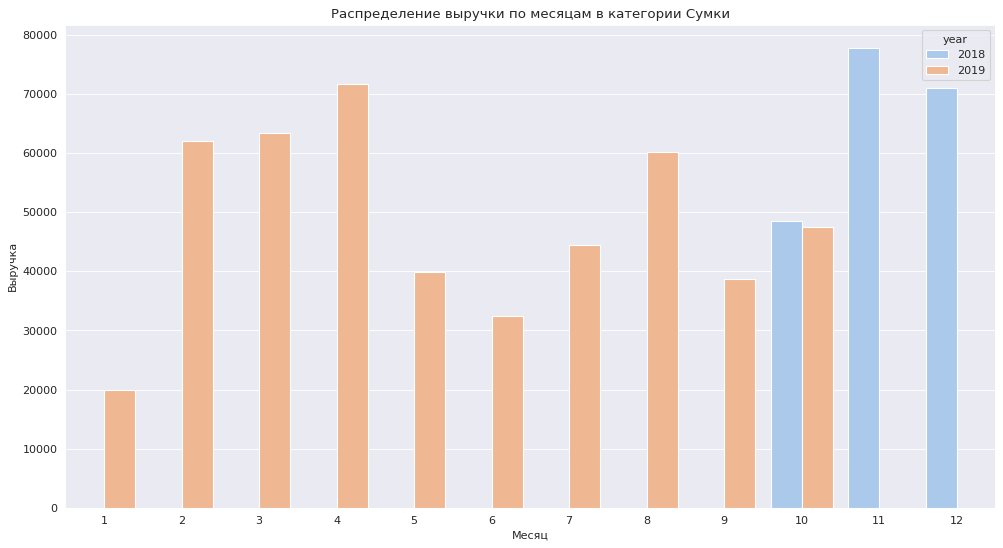

In [65]:
plt.figure(figsize=(15,8), dpi = 80)

rev_bag = data2.query('category == "Сумки, тележки"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_bag, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории Сумки')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

С прошлого года видим спад, затем рост с началом весны и в августе.

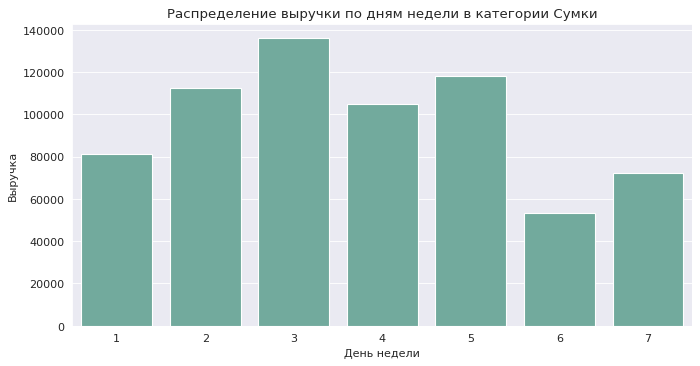

In [66]:
plt.figure(figsize=(10,5), dpi = 80)

rev_bag = data2.query('category == "Сумки, тележки"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_bag, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории Сумки')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Сумки лучше продаются в среду и пятницу.

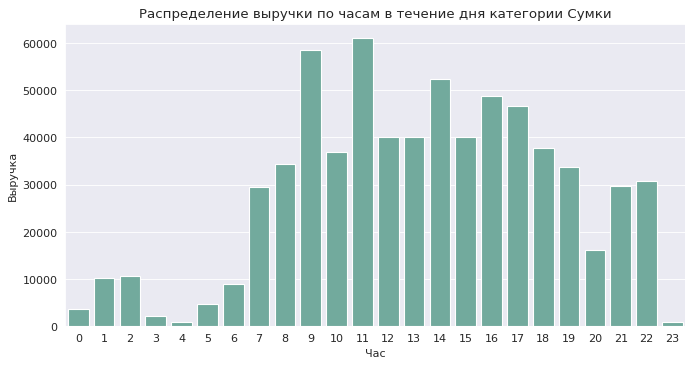

In [67]:
plt.figure(figsize=(10,5), dpi = 80)

rev_bag = data2.query('category == "Сумки, тележки"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_bag, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в течение дня категории Сумки')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Сумки покупают больше в 9 и 11 часов.

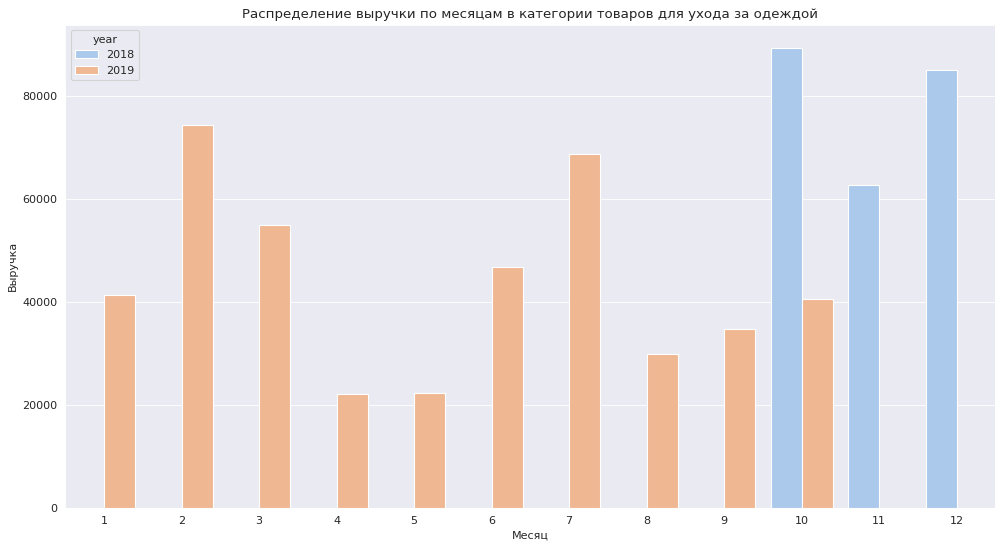

In [68]:
plt.figure(figsize=(15,8), dpi = 80)

rev_wear = data2.query('category == "Для ухода за одеждой"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_wear, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории товаров для ухода за одеждой')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Товары для ухода за одеждой лучше покупают в феврале и июле. Виден также спад с прошлого года

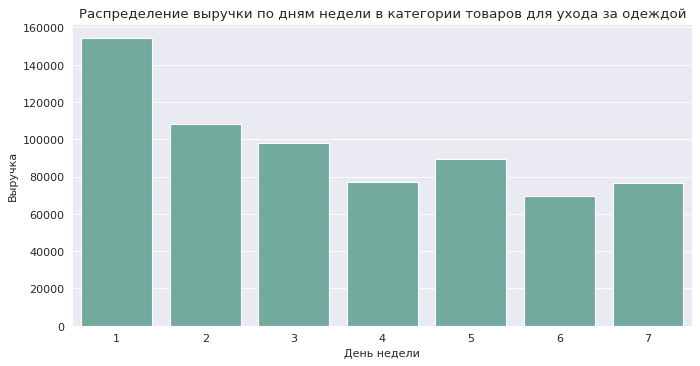

In [69]:
plt.figure(figsize=(10,5), dpi = 80)

rev_wear = data2.query('category == "Для ухода за одеждой"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_wear, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории товаров для ухода за одеждой')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Интересно, что товары для одежды лучше продаются в понедельник.

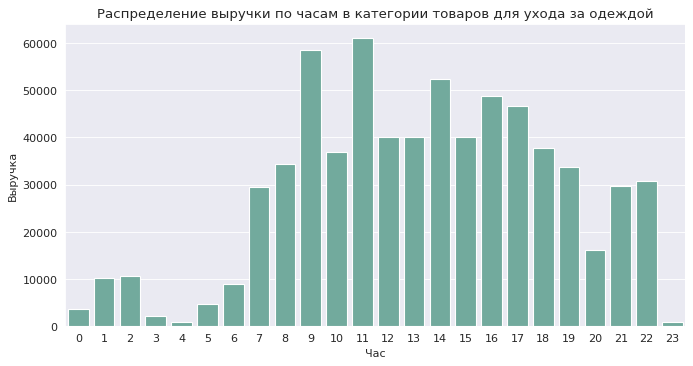

In [70]:
plt.figure(figsize=(10,5), dpi = 80)

rev_wear = data2.query('category == "Сумки, тележки"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_wear, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в категории товаров для ухода за одеждой')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Видим пик продаж в 9 и 11 часов.

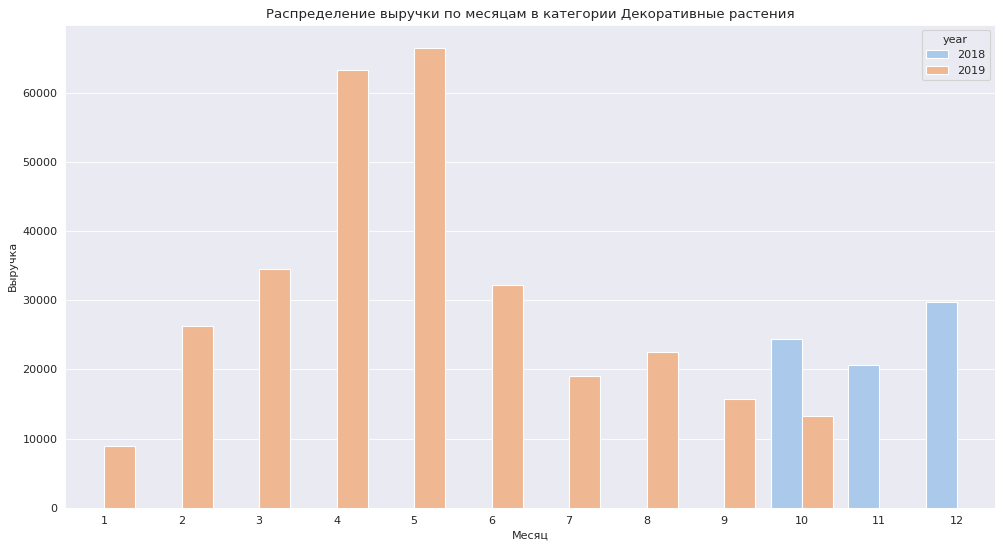

In [71]:
plt.figure(figsize=(15,8), dpi = 80)

rev_plant = data2.query('category == "Декоративные растения"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_plant, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории Декоративные растения')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

С растениями видна сезонность, продажи растут с началом весным. Видимо, вместе с началом дачного сезона.

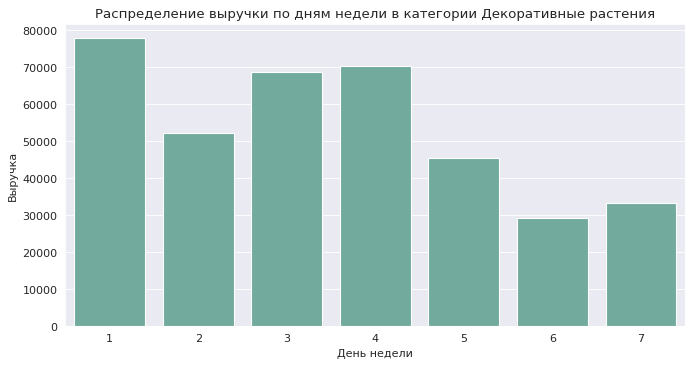

In [72]:
plt.figure(figsize=(10,5), dpi = 80)

rev_plant = data2.query('category == "Декоративные растения"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_plant, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории Декоративные растения')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Максимальные продажи в понедельник и снижаются к концу недели.

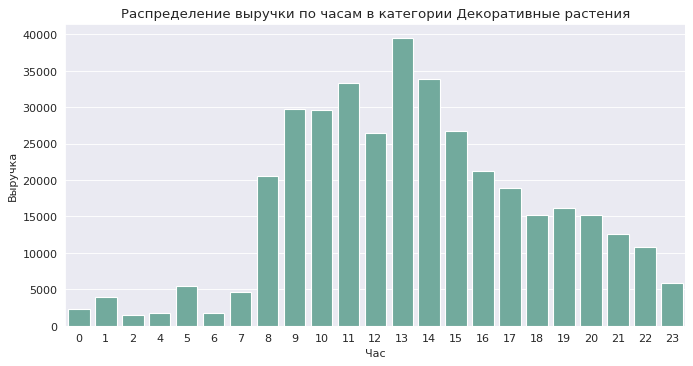

In [73]:
plt.figure(figsize=(10,5), dpi = 80)

rev_plant = data2.query('category == "Декоративные растения"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_plant, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в категории Декоративные растения')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Больше всего покупают растения с 13 до 14 часов.

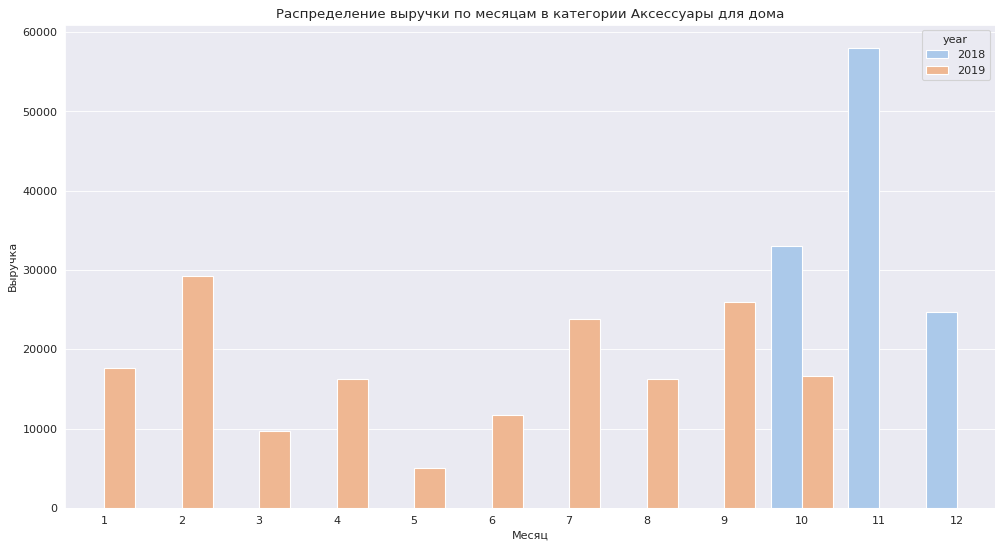

In [74]:
plt.figure(figsize=(15,8), dpi = 80)

rev_house = data2.query('category == "Аксессуары для дома"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_house, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории Аксессуары для дома')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Виден пик в ноябре. Вероятно связано с подготовкой к новогодним праздникам, люди покупают в подарок.

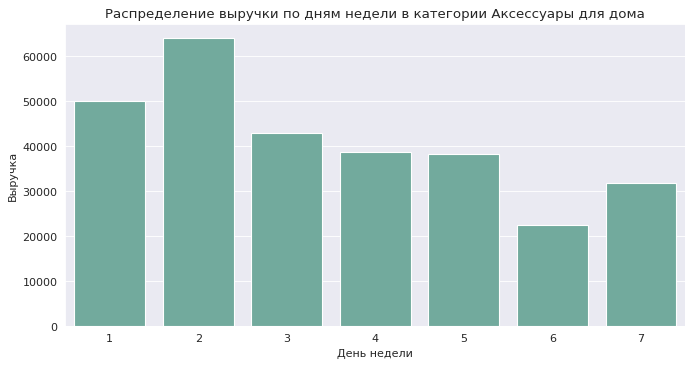

In [75]:
plt.figure(figsize=(10,5), dpi = 80)

rev_house = data2.query('category == "Аксессуары для дома"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_house, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории Аксессуары для дома')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Аксессуары для дома растут в продажах до вторника, затем снижаются.

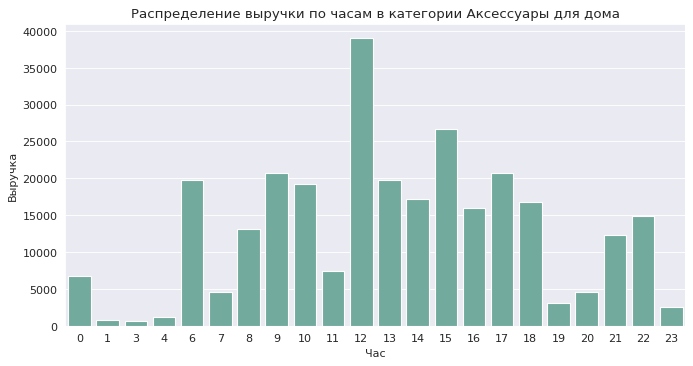

In [76]:
plt.figure(figsize=(10,5), dpi = 80)

rev_house = data2.query('category == "Аксессуары для дома"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_house, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в категории Аксессуары для дома')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Виден пик в 12 часов.

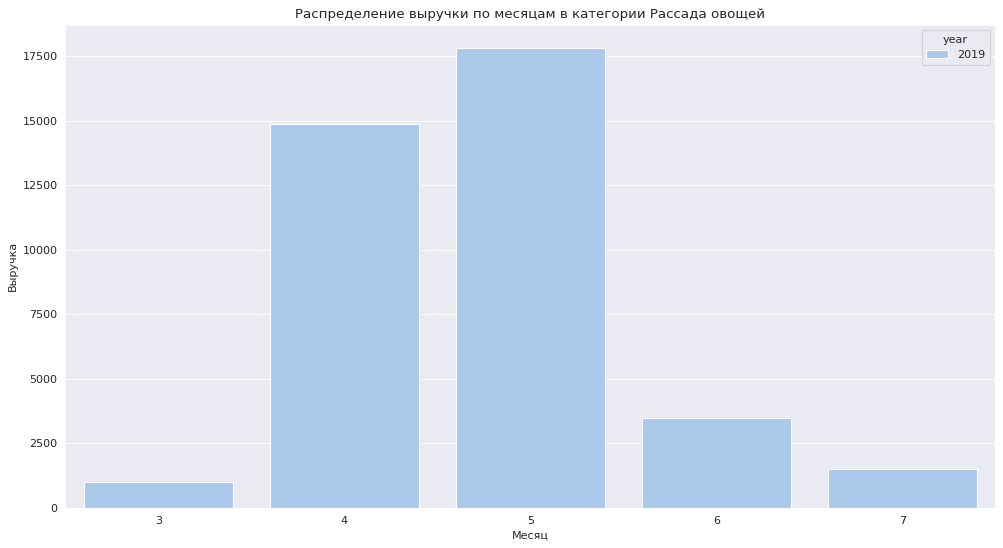

In [77]:
plt.figure(figsize=(15,8), dpi = 80)

rev_veg = data2.query('category == "Рассада овощей"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_veg, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории Рассада овощей')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Также видна сезонность, рассаду очевидно покупают к началу дачного сезонам. Также видим, что в ассортименте магазина рассада появилась с марта в 2019 году.

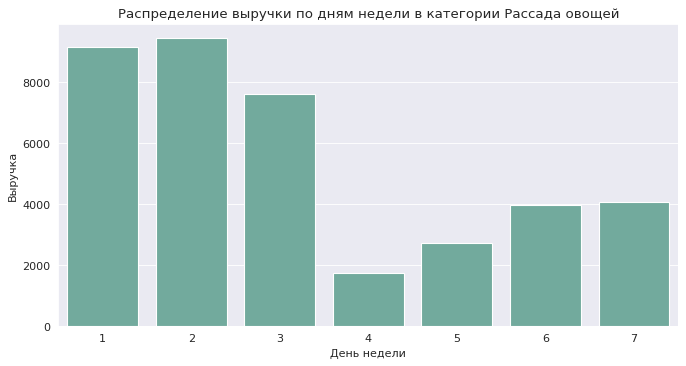

In [78]:
plt.figure(figsize=(10,5), dpi = 80)

rev_veg = data2.query('category == "Рассада овощей"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_veg, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории Рассада овощей')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Рассаду лучше покупают в первые три дня недели.

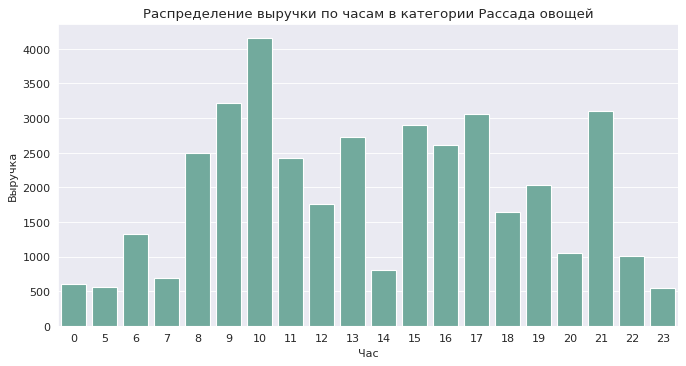

In [79]:
plt.figure(figsize=(10,5), dpi = 80)

rev_veg = data2.query('category == "Рассада овощей"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_veg, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в категории Рассада овощей')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Выраженные пики в 10, 17 и 21 час.

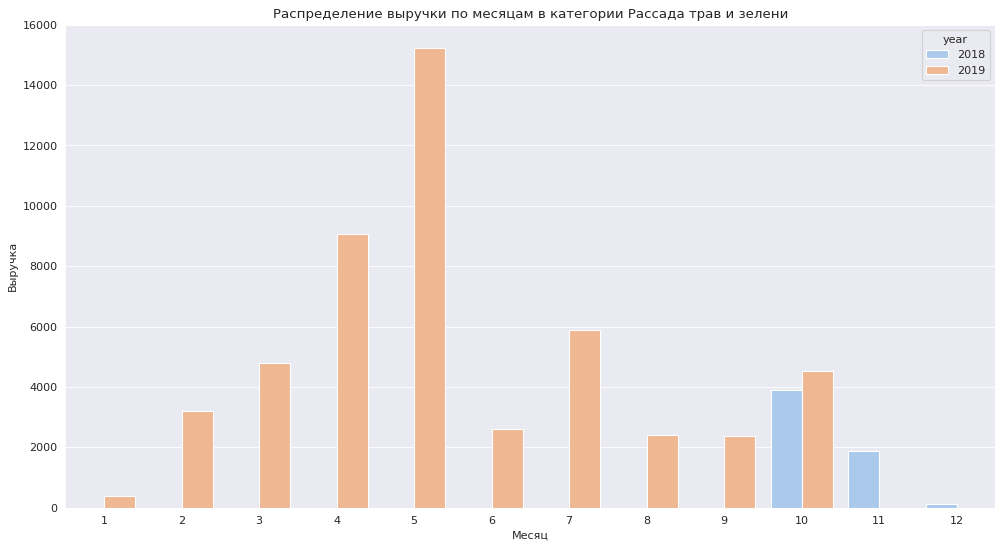

In [80]:
plt.figure(figsize=(15,8), dpi = 80)

rev_herb = data2.query('category == "Рассада трав и зелени"').groupby(['month','year'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_herb, x = 'month', y = 'price_total', hue = 'year')
plt.title('Распределение выручки по месяцам в категории Рассада трав и зелени')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.show()

Также видна сезонность, рост продаж с началом апреля и дачного сезона.

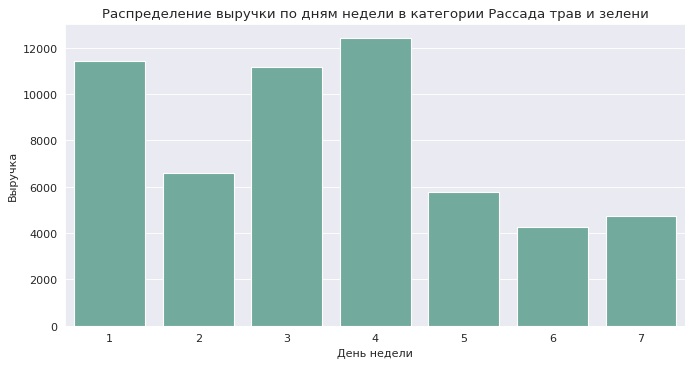

In [81]:
plt.figure(figsize=(10,5), dpi = 80)

rev_herb = data2.query('category == "Рассада трав и зелени"').groupby(['day_of_week'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)

sns.set_style('darkgrid')
sns.barplot(data = rev_herb, x = 'day_of_week', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по дням недели в категории Рассада трав и зелени')
plt.ylabel('Выручка')
plt.xlabel('День недели')
plt.show()

Рассаду зелени и трав лучше покупают в начале недели.

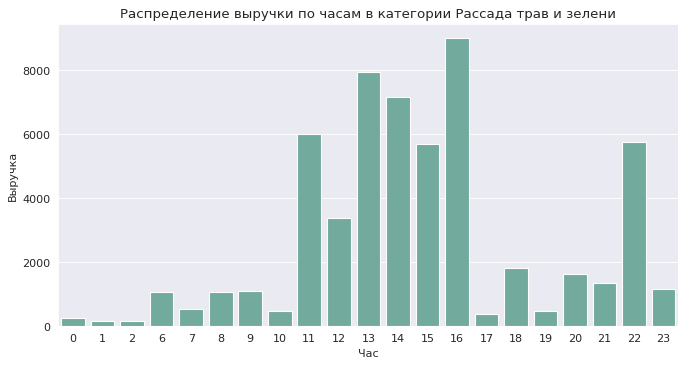

In [82]:
plt.figure(figsize=(10,5), dpi = 80)

rev_herb = data2.query('category == "Рассада трав и зелени"').groupby(['hour'],as_index=False).agg({'price_total':'sum'}).sort_values('price_total',ascending=False)


sns.set_style('darkgrid')
sns.barplot(data = rev_herb, x = 'hour', y = 'price_total',color='#69b3a2')
plt.title('Распределение выручки по часам в категории Рассада трав и зелени')
plt.ylabel('Выручка')
plt.xlabel('Час')
plt.show()

Видим, что основные продажи приходятся с 11 до 16, и, что интересно, на 22 часа.

**Вывод по разделу**:
* магазин в основном зарабатывает на сумках и товарах для ухода за одеждой
* при этом чаще всего заказывают из категории декоративных растений
* товары для ухода за одеждой продаются лучше осенью и зимой, вероятно из-за непогоды, когда одежда чаще требует ухода
* у рассады трав, овощей и декоративных растений видна сезонность, продажи растут в апреле и мае, с началом дачного сезона
* у аксессуаров для дома пик продаж приходится на ноябрь, что видимо связно с подготовкой к праздникам
* у основых категорий товара пик приходится на рабочие часы и будние дни
* ночные часы заказы падают, большая часть покупателей, очевидно, спит

## Проверка гипотез

Проверка гипотезы: выручка в выходные равна выручке в будние дни

```
H_0: Выручка (price_total) в выходные = выручка (price_total) в будни`
H_1: Выручка (price_total) в выходные ≠ выручка (price_total) в будни`
alpha = 0.05
```

In [85]:
alpha = 0.01 #значение уровня значимости

results = st.ttest_ind(  #Поскольку речь идёт о проверке равенства средних двух распределений, используем метод .ttest_ind()
    data.query('day_of_week in [6,7]')['price_total'],
    data.query('day_of_week not in [6,7]')['price_total'] 
    
)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.22923018476102378
Не получилось отвергнуть нулевую гипотезу


In [86]:
(data.query('day_of_week in [6,7]')['price_total'].mean() / data.query('day_of_week not in [6,7]')['price_total'].mean()).round(2)

0.92

Интересно, что несмотря на больший размер выборки у заказов по будням, средние чеки с выходными различаются незначительно, всего на 8%

Проверка гипотезы: количество заказов ночью равно количеству заказов днем

```
H_0: Количество заказов ночью = количество заказов днем`
H_1: Количество заказов ночью ≠ количество заказов днем`
alpha = 0.05
```

In [87]:
alpha = 0.05 #значение уровня значимости

results = st.ttest_ind(  #Поскольку речь идёт о проверке равенства средних двух распределений, используем метод .ttest_ind()
    data.query(' 0 <= hour <= 6').groupby('hour')['order_id'].count(),
    data.query(' 6 < hour <= 18').groupby('hour')['order_id'].count()
    
)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

7.209355818696855e-07
Отвергаем нулевую гипотезу


In [88]:
data.query(' 0 <= hour <= 6').groupby('hour')['order_id'].count().mean() / data.query(' 6 < hour <= 18').groupby('hour')['order_id'].count().mean()

0.10523727563314483

Логично, что в ночные часы заказы падают, т.к большая часть пользователей отдыхает. В дневное время оформляется около 90% всех заказов.

## Общий вывод по работе

Был изучен набор данных интернет-магазина "Пока все ещё тут" — о продажа товаров для дома с октября 2018 по октябрь 2019 годов.

В процессе проведена предобработка данных: проверены пропуски и дубликаты, изменены типы данных в столбцах, устранены неявные дубли, изучены аномалии и выбросы.

В ходе исследования определены особенности:
* ряд категорий товаров имеет сезонность, рассаду трав, овощей и растений лучше покупают с началом дачного сезона. Товары по уходу за одеждой зимой и осенью, аксессуары для дома в предновогоднее время

* магазин в основном зарабатывает на сумках и товарах для ухода за одеждой

* при этом чаще покупают декоративные растения, больше всего заказов в этой категории

* данные по датам за неполные два года, но можно увидеть, что по сравнению с 2018 продажи уменьшились

* максимальная активность приходится на начало недели, в рабочие часы, ночью число заказов падает

Поскольку по заказам явно лидируют рассада и растения, можно назвать их основным ассортиментом магазина. Поэтому стоит расширить дополнительный ассортимент именно к этим товарам. Например, удобрения, землю, садовый инвентарь и т.д. Также можно устраивать акции и распродажи к началу дачного сезона.

## Презентация, дашборд

Ссылка на презентацию - https://drive.google.com/file/d/1AU6DCtyRbKxjmmIzAQX_2vwWIqLOP7KR/view?usp=sharing

Дашборд - https://public.tableau.com/views/ecommerce_dash_16686099092670/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link